# Project2: Anomaly Detection for Exotic Event Identification at the Large Hadron Collider 




## Brief Introduction to the Standard Model and Large Hadron Collider


The Standard model (SM) of Particle Physics is the most complete model physicists have for understanding the interactions of the fundamental particles in the universe. The elementary particles of the SM are shown in Fig.1.

---
<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Standard_Model_of_Elementary_Particles.svg/627px-Standard_Model_of_Elementary_Particles.svg.png" alt="SM" style="width: 600px;"/>
    <figcaption>Fig.1 - Elementary particles of the Standard Model.</figcaption>
</figure>

---

It is comprised of matter particles (**fermions**):
- **leptons**
    - electrons
    - muon
    - tau
    - and respective neutrinos
- **quarks** which are the building blocks of protons

as well as force carrier particles (**bosons**):
- photon and W/Z bosons (electroweak force)
- gluons (strong force)

and the Higgs boson which is attributed to the mechanism which gives particles their mass.


Though the SM has experimentally stood the test of time, many outstanding questions about the universe and the model itself remain, and scientist continue to probe for inconsistencies in the SM in order to find new physics. More exotic models such as **Supersymmetry (SUSY)** predic mirror particles which may exist and have alluded detection thus far. 

---

The **Large Hadron Collider** (LHC) is a particle smasher capable of colliding protons at a centre of mass energy of 14 TeV.
**ATLAS** is general purpouse particle detectors tasked with recording the remnants of proton collisions at the collicion point. The main purpouse of this experiment is to test the SM rigorously, and ATLAS was one of two expeririments (ATLAS+CMS) responsible for the discovery of the **Higgs boson in 2012**. 

Find an animation of how particles are reconstructed within a slice of the ATLAS detector here: https://videos.cern.ch/record/2770812. Electrons, muons, photons, quark jets, etc, will interact with different layers of the detector in different ways, making it possible to design algorithms which distinguish reconstructed particles, measure their trajectories, charge and energy, and identify them as particular types.

Figure 2 shows an event display from a data event in ATLAS in which 2 muons (red), 2 electrons (green), and 1 quark-jet (purple cone) are found. This event is a candidate to a Higgs boson decaying to four leptons with an associated jet: $$H (+j)\rightarrow 2\mu 2e (+j)$$ 



---

<figure>
    <img src="https://twiki.cern.ch/twiki/pub/AtlasPublic/EventDisplayRun2Physics/JiveXML_327636_1535020856-RZ-LegoPlot-EventInfo-2017-10-18-19-01-24.png" alt="Higgs to leptons" style="width: 600px;"/>
    <figcaption>Fig.2 - Event display of a Higgs candidate decaying to two muons and two electrons.</figcaption>
</figure>

---


Particles are shown transversing the detector material. The 3D histogram show 
* the azimuth $\phi$ ( angle around the beam, 0 is up)
* pseudo-rapidity $\eta$ (trajectory along the beam) positions of the particle directions with respect to the interaction point.
* The total energy measured for the particle is denoted by $E$,
* the transverse momentum ($p_T$) deposited by the particle in giga-electronvolts (GeV) are shown by the hight of the histograms.

A particle kinematics can then be described by a four-vector  $$\bar{p} = (E,p_T,\eta,\phi)$$

An additional importan quantity is the missing energy in the transverse plane (MET). This is calculated by taking the negative sum of the transverse momentum of all particles in the event.
$$\mathrm{MET} = -\sum p_T$$

With perfect detector performance the MET will sum to 0 if all outgoing particles are observed by the detector. Neutrinos cannot be measured by the detector and hence their precense produces non-zero MET.

## Anomally detection dataset

For the anomally detection project we will use the dataset discussed in this publication: <p><a href="https://arxiv.org/pdf/2105.14027.pdf" title="Anomalies">The Dark Machines Anomaly Score Challenge:
Benchmark Data and Model Independent Event
Classification for the Large Hadron Collider</a></p>

Familiarise yourself with the paper, in particular from sections 2.1 to 4.4.

---

The dataset contains a collection of simulated proton-proton collisions in a general particle physics detector (such as ATLAS). We will use a dataset containing `340 000` SM events (referred to as channel 2b in the paper) which have at least 2 electrons/muons in the event with $p_T>15$ GeV. 

**The events can be found in `background_chan2b_7.8.csv`**


You can see all the SM processes that are simulated in Table 2 of the paper, 

    e.g., an event with a process ID of `w_jets` is a simulated event of two protons producing a lepton and neutrino and at least two jets.
    
$$pp\rightarrow \ell\nu(+2j)$$

---

The datasets are collected as CSV files where each line represents a single event, with the current format:

`event ID; process ID; event weight; MET; METphi; obj1, E1, pt1, eta1, phi1; obj2, E2, pt2, eta2, phi2; ...`
See Section 2.2 for a description of the dataset.
Variables are split by a semicolon `";"`
- `event ID`: an identifier for the event number in the simulation
- `process ID`: an identifier for the event simulation type
- `event weight`: the weight associated to the simulated event (how important that event is)
- `MET`: the missing transverse energy
- `METphi`: the azimuth angle (direction) of the MET

the a list of objects (particles) whose variables are split by commas `","` in the following orger:
- `obj`: the object type,

    |Key|Particle|
    |---|---|
    |j|jet|
    |b|b-jet|
    |e-|electron|
    |e+|positron|
    |m-|muon|
    |m+|muon+|
    |g|photon|
    
    *see Table 1 of the paper*
- `E`: the total measured particle energy in MeV, [0,inf]
- `pt`: the transverse mementum in MeV, [0,inf]
- `eta`: pseudo-rapidity, [-inf,inf]
- `phi`: azimuth angle, radians [-3.14,3.14]

---

In addition to the SM events we are also provided simulated events from `Beyond Standard Model` (BSM) exotic physics models. They are summarised here:

|Model | File Name | 
|---|---|
|**SUSY chargino-chargino process**||
||`chacha_cha300_neut140_chan2b.csv`|
||`chacha_cha400_neut60_chan2b.csv`|
||`chacha_cha600_neut200_chan2b.csv`|
|**SUSY chargino-neutralino processes**||
||`chaneut_cha200_neut50_chan2b.csv`|
||`chaneut_cha250_neut150_chan2b.csv`|
|**$Z'$ decay to leptons**||
||`pp23mt_50_chan2b.csv`|
||`pp24mt_50_chan2b.csv`|
|**Gluino and RPV SUSY**||
||`gluino_1000.0_neutralino_1.0_chan2b.csv`||
||`stlp_st1000_chan2b.csv`||



## Project description
*Responsible:* Robert Currie (<rob.currie@ed.ac.uk>)

### Overview
The task is to design an anomaly detection algorithm which is trained on the SM dataset and which can be used to flag up interesting (exotic) events from the BSM physics models.

You will do this by designing a robust `AutoEncoder` which is trained on the event level variables `MET; METphi` and the kinematics of the particle level objects. The `AutoEncoder` needs to duplicate the input as output effectively while going through a laten space (bottleneck). 

You will then need to evaluate and discuss the performance of your `AutoEncoder` on the exotic models listed above, and come up with an appropiate metric to identify events from non SM physics.

# **Breakdown**

In the project report you will be assessed in the following way.

1. **Data exploration and preprocessing (20%):** Inspect the datasets; visualise the data (e.g. tables, plots, etc) in an appropriate way; study the composition of the dataset; perform any necessary preprocessing.
2. **Model selection (30%):** Choose a promissing approach; construct the machine learning model; optimise the relevant hyperparameters; train your chosen model.
3. **Performance evaluation (30%):** Evaluate the model in a way that gauges its ability to generalise to unseen data; compare to other approaches; identify the best approach. 
4. **Discussion, style throughout (20%):** Discuss the reasoning or intuition behind your choices; the results you obtain through your studies; the relative merits of the methods you have developed, _etc._ Similarly, make sure that you write efficient code, document your work, clearly convey your results, and convince us that you have mastered the material.


## Data Preprocessing
* The data is provided in a CSV (text) format with semicolon and comma seperated list with **one line per event**. We need to convert this into an appropiate format for our neural networks. 
* Since the number of particles per event is variable you will need to **truncate** and **mask** particles in the event. The following steps need to be perfomed on the SM (background) sample:
     1. Create variables where you count the number of electrons, photons, muons, jets and bjets in the event (ignore charge) before any truncation.
     2. Choose an appropiate number of particles to study per event (recommended: **8** particles are used in the paper)
     3. Check the particles are sorted by energy (largest to smallest)
     4. If the event has more than 8 particles choose the **8 particles** with **highest energy and truncate** the rest.
     5. convert energy and momentum variables by logarithm (e.g., `log`) - this is to prioritise differences in energy **scale** over more minor differences. 
     6. If the event has less than 8 particles, create kinematic variables with 0 values for the missing particles.
* The final set of training variables should look something like this (the exact format is up to you)
    |N ele| N muon| N jets| N bjets| N photons| log(MET)| METphi| log(E1)| log(pt1)| eta1| phi1| ... | phi8|
    |-|-|-|-|-|-|-|-|-|-|-|-|-|
    
    7. After the dataset is ready, use `MinMaxScalar` or similar to standardise the training variables over the SM dataset
* After the SM dataset has been processed use the same processing on the BSM (signal samples). Use the same standardisation functions as on the SM dataset, *Do not recalculate the standardisation*.
* Keep associated metatata (`event ID; process ID; event weight;`) though this does not need processing. 
* Randomise and split the SM (background) dataset into training and testing datasets (the BSM samples don't need to be split (*Why?*))
* *Hint*: It is suggested that you write a class or function for the preprocessing which takes a csv path as input and provides the processed dataset. After you have done the data processing its suggested you save the datasets so as to not have to recalculate them again if the kernel is restarted. 

## Training
* Design an appropiate algorithm which reconstrucuts the input variables after going though a laten space. Choose an appropiate cost function.
    * The suggested method for ease of implementation is the `AutoEncoder`
    * However, if you consider learning about or trying something else, as described in the paper, you should feel welcome to try `VAEs`, `ConvAEs`, `ConvVAEs`, etc. Don't feel you **have** to create an `AE`.

* Explore different architectures for the model, and explain in detail your choice of model, and the final parameters chosen.
* It is suggested to create a class or function around your algorithm which allows you to easily tweek hyperparameters of the model (depth, number of nodes, number of laten variables, activation functions, regularisation, etc)
* Train the model over several parameters to find the best algorithm. Document the process throught and discuss your choices. Keep track of validation performance. Save the models the best points. 
* Explore the results and document your findings. Ask as many questions about your model as you can, and document your findings. Does the model generalise well to data it hasn't seen?

## Evaluation
In the evaluation explore different datasets an try answer as many questions about the performance as possible. 
* Evaluate the performance of the `AE` on BSM dataset. Which models are more or less similar to the SM?
* Explore the anomaly score as a handle on finding new physics. Consider scanning over different anomaly scores and calculating the signal and background efficiencies at each point (plot this for different BSM models). How might you choose a value which flags up a non-SM event? 
* Explore SM events. Which look more anomolous than others? Are there any particular features which are responsible, e.g. particle counts, MET ranges, etc.? 
* Discuss any limitations your algorithm has. How might you update and improve your model in future? Discuss any issues you had, or things you would have liked to try given more time.

---
## Submission


To complete this project, you should **Submit your Jupyter notebook** as a "report." See the comments below on documentation,

**You should submit by Friday 9th Feb 2024 at 10AM**


For all task we're not looking for exceptional model performace and high scores (although those are nice too), **we're mostly concerned with _best practices:_** If you are careful and deliberate in your work, and show us that you can use the tools introduced in the course so far, we're happy!

Training all of these models in sequence takes a very long time so **don't spend hours on training hundreds of epochs.** Be conservative on epoch numbers (30 is normally more than enough) and use appropiate techniques like EarlyStopping to speed things up. Once you land on a good model you can allow for longer training times if performance can still improve.


## Documentation: Annotation and Commentary

It is important that __all__ code is annotated and that you provide brief commentary __at each step__ to explain your approach. We expect well-documented jupyter notebooks, not an unordered collection of code snippets. You can also include any failed approaches if you provide reasonable explanation. 

Unlike weekly checkpoints where you were being guided towards the *''correct''* answer, this project is by design more open ended. It is, therefore, necessary to give some justification for choosing one method over another.
Explain *why* you chose a given approach and *discuss* the results. You can also include any failed approaches if you provide reasonable explanation; we care more about you making an effort and showing that you understand the core concepts.

This is not in the form of a written report so do not provide pages of background material. Only provide a brief explanation for each step. Aim to clearly present your work so that the markers can easily follow your reasoning and can reproduce each of your steps through your analysis. Aim to convince us that you have understood the material covered in the course.

To add commentary above (or below) a code snippet create a new cell and add your text in markdown format. __Do not__ add commentary or significant text as a code comment in the same cell as the code.
(Code comments are still helpful!)

__20\% of the mark for each exercise is allocated to coding style and clarity of comments and approach.__

## Submission Steps

It is important your code is fully functional before it is submitted or this will affect your final mark. 

When you are ready to submit your report perform the following steps: 

 -  In Jupyter run `Kernel` -> `Restart Kernel ` and ` Clear All Outputs `
 -  Then `Kernel` -> `Restart & Run All ` to ensure that all your analysis  is reproducible and all output can be regenerated
 -  Save the notebook, and close Jupyter
 -  **Change the filename to contain Name_Surname**
 -  Tar and zip your project folder if you have multiple files in a working directory. You are free to include any supporting code. Make sure this belongs in the project folder and is referenced correctly in your notebook. Do __not__ include any of the input data.
 -  Submit this file or zipped folder through Learn. In case of problems or if your compressed project folder exceeds 20 MB (first make sure you are not including any CSV files, then) email your submission to Kieran (the course administrator) at the Teaching Office and me.

# Happy Anomaly Hunting
---
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Data Scientist (n.): Person who is better at statistics than any software engineer and better at software engineering than any statistician.</p>&mdash; Josh Wills (@josh_wills) <a href="https://twitter.com/josh_wills/status/198093512149958656?ref_src=twsrc%5Etfw">May 3, 2012</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

---

Your code follows....

In [1]:
from numpy.random import randint
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as g
import os

from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau
from sklearn.utils import shuffle
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import load_model

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)
pd.set_option("display.precision", 1)

csv_files = g.glob('data//*.csv')
print(csv_files)

C:\Users\hanna\AppData\Local\Temp\ipykernel_5672\3804645957.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



['data\\background_chan2b_7.8.csv', 'data\\chacha_cha300_neut140_chan2b.csv', 'data\\chacha_cha400_neut60_chan2b.csv', 'data\\chacha_cha600_neut200_chan2b.csv', 'data\\chaneut_cha200_neut50_chan2b.csv', 'data\\chaneut_cha250_neut150_chan2b.csv', 'data\\gluino_1000.0_neutralino_1.0_chan2b.csv', 'data\\pp23mt_50_chan2b.csv', 'data\\pp24mt_50_chan2b.csv', 'data\\stlp_st1000_chan2b.csv']


C:\Users\hanna\AppData\Local\Temp\ipykernel_5672\3804645957.py:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# 1. Data Exploration

Largest file rows on the order of 340,000

In [2]:
number_events = 20
number_chosen_events = 8
metadata = ["event ID", "process ID", "event weight", "MET", "METphi"] 
event_vars = ["obj", "E", "pt", "eta", "phi"]
particles = ['e-', 'e+', 'm-', 'm+', 'j', 'b', 'g']
momentum_params = ['log(MET)']

unprocessed_cols = metadata.copy()
events = [f'Event{i}' for i in range(number_events)]
unprocessed_cols.extend(events)
processed_cols = metadata.copy()
processed_cols.extend(momentum_params)

## adding all objects numbered events to self.columns ##
number_cols = ['N ele', 'N jets', 'N bjets', 'N photons', 'N muon']
processed_cols.extend(number_cols)
for i in range(number_events):
    processed_cols.extend([f"{col}{i}" for col in event_vars])
    processed_cols.extend([f'log(E{i})', f'log(pt{i})'])

objects = [f'{event_vars[0]}{i}' for i in range(number_events)]

## define the data types of the columns to impove reading speed ##
df_dtype={'event ID': 'int64', 'process ID': 'str', 'event weight': 'float64', 'MET': 'float64', 'METphi': 'float64',
          'log(MET)': 'float64', 'N ele': 'int64', 'N jets': 'int64', 'N bjets': 'int64', 'N photons': 'int64', 'N muon': 'int64'}
df_dtype.update({col: 'float64' for col in unprocessed_cols[5:]}) # all the particle columns to floats
df_dtype.update({event: 'str' for event in [f'Event{i}' for i in range(number_events)]})
for key in df_dtype: # all objects to strings
    if 'obj' in key:
        df_dtype[key] = 'str'

print(processed_cols)
print(unprocessed_cols)

['event ID', 'process ID', 'event weight', 'MET', 'METphi', 'log(MET)', 'N ele', 'N jets', 'N bjets', 'N photons', 'N muon', 'obj0', 'E0', 'pt0', 'eta0', 'phi0', 'log(E0)', 'log(pt0)', 'obj1', 'E1', 'pt1', 'eta1', 'phi1', 'log(E1)', 'log(pt1)', 'obj2', 'E2', 'pt2', 'eta2', 'phi2', 'log(E2)', 'log(pt2)', 'obj3', 'E3', 'pt3', 'eta3', 'phi3', 'log(E3)', 'log(pt3)', 'obj4', 'E4', 'pt4', 'eta4', 'phi4', 'log(E4)', 'log(pt4)', 'obj5', 'E5', 'pt5', 'eta5', 'phi5', 'log(E5)', 'log(pt5)', 'obj6', 'E6', 'pt6', 'eta6', 'phi6', 'log(E6)', 'log(pt6)', 'obj7', 'E7', 'pt7', 'eta7', 'phi7', 'log(E7)', 'log(pt7)', 'obj8', 'E8', 'pt8', 'eta8', 'phi8', 'log(E8)', 'log(pt8)', 'obj9', 'E9', 'pt9', 'eta9', 'phi9', 'log(E9)', 'log(pt9)', 'obj10', 'E10', 'pt10', 'eta10', 'phi10', 'log(E10)', 'log(pt10)', 'obj11', 'E11', 'pt11', 'eta11', 'phi11', 'log(E11)', 'log(pt11)', 'obj12', 'E12', 'pt12', 'eta12', 'phi12', 'log(E12)', 'log(pt12)', 'obj13', 'E13', 'pt13', 'eta13', 'phi13', 'log(E13)', 'log(pt13)', 'obj14'

In [3]:
class PreprocessData:
    '''Only check energy order when testing for a small number of rows.
       This class takes a csv file in the data folder and processes it into a new csv file with 
       a similar name but in a different directory
       directory (str): the directory of the file to be processed
       check_order (bool): if True, checks that the energies are in ascending order, if False, does not check'''

    def __init__(self, directory, check_order=False): 
        print('checking ==== ', directory)
        filename = directory[5:] 
        save_dir = 'data\processed\processed_'+filename.split('.')[0] + '.csv'
        ## check file path exisits, if not proceed ##
        if os.path.exists(save_dir):
            print(f'File {filename} already exists')
            return   
        else:         
            ## read the data into a pandas dataframe ##
            self.unprocessed_df = pd.read_csv(directory, sep=";", names=unprocessed_cols, dtype=df_dtype)
            self.processed_df = pd.DataFrame(columns=processed_cols)
            self.processed_df[metadata] = self.unprocessed_df[metadata]

            self.unprocessed_df[events] = self.unprocessed_df[events].astype('str')
            self.split_events()
            ## from count_particles onwards, no obj in processed df ##
            self.count_particles()
    

            ## sort the particles by energy ##
            self.sort_particles()
            if check_order: self.check_energy_order()
            self.log_momentum_energy()
            self.trunate_df()
            self.processed_df = self.processed_df.fillna(0)

            ## save the processed dataframe to a csv file ##
            self.processed_df.to_csv(save_dir, sep=';', index=False, header=False)
            print(f'File {filename} has been processed and saved as {save_dir}')


 
    def split_events(self): # split the Event columns
        individual_events = pd.DataFrame(columns=[f'{event_vars[i]}{j}' for i in range(len(event_vars)) for j in range(number_events)])
        for i in range(len(event_vars)):
            numbered_vars = [f'{event_vars[i]}{j}' for j in range(number_events)]
            individual_events[numbered_vars] = self.unprocessed_df[events].apply(lambda x: x.str.split(',').str[i])
            
            ## make sure obj cols are strings ##
            if event_vars[i] == 'obj':
                individual_events[numbered_vars] = individual_events[numbered_vars].astype('str')
                individual_events[numbered_vars] = individual_events[numbered_vars].astype('str')
            else: # make sure all other cols are floats
                individual_events[numbered_vars] = individual_events[numbered_vars].astype('float64')
                individual_events[numbered_vars] = individual_events[numbered_vars].astype('float64')
        
        self.unprocessed_df = pd.concat([self.unprocessed_df, individual_events], axis=1)
        

    def count_particles(self): # do before truncating
        # count the number of each particles in the event and add to processed df
        valuecoutns = self.unprocessed_df[objects].apply(pd.Series.value_counts, axis=1).fillna(0) 
        self.processed_df['N ele'] = valuecoutns['e-'] + valuecoutns['e+']
        self.processed_df['N muon'] = valuecoutns['m-'] + valuecoutns['m+']
        self.processed_df['N jets'] = valuecoutns['j']
        self.processed_df['N bjets'] = valuecoutns['b']
        self.processed_df['N photons'] = valuecoutns['g']
        self.processed_df = self.processed_df.fillna(0)


    def sort_particles(self): # do after just before truncating
        number_rows = self.unprocessed_df.shape[0]
        print('Sorting particles')
        energy_cols = [f'E{i}' for i in range(number_events)]
        attr_cols = ['pt', 'eta', 'phi']
        
        ## check dtypes are correct ##
        self.processed_df[objects] = self.processed_df[objects].astype('str') 
        for i in range(number_events):
            self.processed_df[f'E{i}'] = self.unprocessed_df[f'E{i}'].astype('float64')
            self.processed_df[f'pt{i}'] = self.unprocessed_df[f'pt{i}'].astype('float64')
            self.processed_df[f'eta{i}'] = self.unprocessed_df[f'eta{i}'].astype('float64')
            self.processed_df[f'phi{i}'] = self.unprocessed_df[f'phi{i}'].astype('float64')
            
        ## noe sort the particles by energy ##
        for index, row in self.unprocessed_df.iterrows():
            # Create a list of tuples where each tuple contains the energy and corresponding attributes
            energies_with_attrs = [(row[f'E{i}'], [row[f'{attr}{i}'] for attr in attr_cols]) for i in range(len(energy_cols))]
            
            # Sort the list of tuples by energy in descending order
            # first remove all zero energies (non-particles)
            non_zero_energies_with_attrs = [(energy, attributes) for energy, attributes in energies_with_attrs if float(energy) != 0]
            sorted_energies_with_attrs = sorted(non_zero_energies_with_attrs, key=lambda x: float(x[0]), reverse=True)
            
            # Check if energies are in order
            if [e[0] for e in sorted_energies_with_attrs] != [row[f'E{i}'] for i in range(len(energy_cols))]:
                # Swap all columns together if not in order
                for i, (energy_val, attributes) in enumerate(sorted_energies_with_attrs):
                    # i is the partcle number and energy is the energy of that particle
                    # attributs are the other values of that same particle: ['obj', 'pt', 'eta', 'phi']
                    for j in range(len(attr_cols)):
                        self.processed_df.at[index, f'{attr_cols[j]}{i}'] = attributes[j]
                    self.processed_df.at[index, f'E{i}'] = energy_val

            if index % (number_rows/10) == 0: print(100*index/number_rows, r'% rows processed') 
        # make all nans 0
        self.processed_df = self.processed_df.fillna(0)


    def check_energy_order(self):
        '''I checked this when reading only 100 rows to check the code works'''
        # double check that the energies are in descending order
        for i, row in self.processed_df.iterrows():
            rowi = row[[f'E{j}' for j in range(number_events)]].astype('float')
            for j in range(number_events-1):
                try: assert rowi[f'E{j}'] >= rowi[f'E{j+1}']
                except: print('ROW', rowi[f'E{j}'], rowi[f'E{j+1}'], '!!!IS NOT IN ORDER!!!!')


    def log_momentum_energy(self): # do last before truncating
        self.processed_df['log(MET)'] = np.log(self.unprocessed_df["MET"].astype('float64'))
        for i in range(number_events):
            self.processed_df[f'log(E{i})'] = np.log(self.unprocessed_df[f'E{i}'].astype('float64'))
            self.processed_df[f'log(pt{i})'] = np.log(self.unprocessed_df[f'pt{i}'].astype('float64'))

    def trunate_df(self):
        ## truncate the dataframe to the first number_chosen_events ##
        self.processed_df.drop(objects, axis='columns', inplace=True)
        self.processed_df = self.processed_df.iloc[:, :number_chosen_events*(len(event_vars) -1 + 2)+len(metadata)+len(momentum_params)+6]


In [4]:
for f in csv_files:
    PreprocessData(f)
    print('done', f)

checking ====  data\background_chan2b_7.8.csv
File background_chan2b_7.8.csv already exists
done data\background_chan2b_7.8.csv
checking ====  data\chacha_cha300_neut140_chan2b.csv
File chacha_cha300_neut140_chan2b.csv already exists
done data\chacha_cha300_neut140_chan2b.csv
checking ====  data\chacha_cha400_neut60_chan2b.csv
File chacha_cha400_neut60_chan2b.csv already exists
done data\chacha_cha400_neut60_chan2b.csv
checking ====  data\chacha_cha600_neut200_chan2b.csv
File chacha_cha600_neut200_chan2b.csv already exists
done data\chacha_cha600_neut200_chan2b.csv
checking ====  data\chaneut_cha200_neut50_chan2b.csv
File chaneut_cha200_neut50_chan2b.csv already exists
done data\chaneut_cha200_neut50_chan2b.csv
checking ====  data\chaneut_cha250_neut150_chan2b.csv
File chaneut_cha250_neut150_chan2b.csv already exists
done data\chaneut_cha250_neut150_chan2b.csv
checking ====  data\gluino_1000.0_neutralino_1.0_chan2b.csv
File gluino_1000.0_neutralino_1.0_chan2b.csv already exists
done da

In [5]:
processed_cols = [item for item in processed_cols if item not in objects]

In [6]:
ex = pd.read_csv('data\processed\processed_chacha_cha600_neut200_chan2b.csv', sep=';', header=None, dtype=df_dtype)
print(objects)
ex

['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'obj7', 'obj8', 'obj9', 'obj10', 'obj11', 'obj12', 'obj13', 'obj14', 'obj15', 'obj16', 'obj17', 'obj18', 'obj19']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,50494,chacha_cha600_neut200,8.1e-08,5.4e+04,-1.1e+00,10.9,1.0,2.0,0.0,0.0,1.0,121228.0,68888.8,-1.2e+00,2.7,11.7,11.1,108160.0,107802.0,8.1e-02,-2.8,11.1,10.4,67457.1,33416.5,1.3,1.4e+00,10.0,9.8,22681.7,18793.2,6.3e-01,-1.3,11.6,11.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50494,chacha_cha600_neut200,8.1e-08,2.4e+05,9.6e-02,12.4,0.0,1.0,0.0,1.0,2.0,426377.0,260433.0,1.1e+00,-3.0,13.0,12.5,292200.0,58376.4,2.3e+00,-1.8,12.4,12.0,235719.0,170608.0,0.8,7.2e-01,12.6,11.0,24707.5,18982.2,7.6e-01,0.6,10.1,9.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50494,chacha_cha600_neut200,8.1e-08,1.9e+05,3.2e-01,12.2,2.0,4.0,0.0,0.0,0.0,268043.0,266971.0,-9.0e-02,-2.5,12.3,11.8,230800.0,131425.0,1.2e+00,1.7,12.0,10.7,161185.0,44084.2,2.0,2.2e+00,11.3,10.4,77807.5,34418.3,-1.5e+00,-0.5,11.2,10.1,69689.5,25201.9,-1.7,-1.4,12.5,12.5,47982.0,45001.0,-0.4,-0.8,10.8,10.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50494,chacha_cha600_neut200,8.1e-08,1.5e+05,2.7e+00,11.9,1.0,3.0,0.0,0.0,1.0,275729.0,34351.2,-2.8e+00,0.7,12.4,11.1,235237.0,68679.7,-1.9e+00,0.2,11.3,11.0,188648.0,31729.2,2.5,9.5e-02,12.5,10.4,81051.1,57516.4,-8.7e-01,-1.6,11.1,11.1,67237.4,64731.0,-0.3,-0.5,12.1,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50494,chacha_cha600_neut200,8.1e-08,5.4e+05,-1.2e+00,13.2,1.0,1.0,0.0,0.0,1.0,706483.0,422554.0,1.1e+00,1.5,12.9,12.3,394437.0,228417.0,-1.1e+00,2.8,13.5,13.0,149247.0,142721.0,0.3,-5.7e-01,11.9,11.9,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,50494,chacha_cha600_neut200,8.1e-08,1.7e+05,1.4e+00,12.1,1.0,2.0,0.0,0.0,1.0,427722.0,24596.9,-3.5e+00,-1.1,12.4,12.1,378847.0,312768.0,-6.4e-01,0.5,13.0,10.1,252702.0,182713.0,-0.8,-1.9e+00,10.4,10.3,31296.0,31214.3,-7.2e-02,1.8,12.8,12.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1201,50494,chacha_cha600_neut200,8.1e-08,8.6e+04,1.6e+00,11.4,1.0,2.0,0.0,0.0,1.0,262704.0,93236.7,-1.7e+00,-1.6,10.8,10.7,56188.7,54827.0,2.2e-01,-2.3,10.1,10.1,49408.4,45488.9,0.4,8.7e-01,12.5,11.4,25101.3,24615.8,1.7e-02,3.1,10.9,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1202,50494,chacha_cha600_neut200,8.1e-08,9.5e+04,-1.3e+00,11.5,1.0,1.0,0.0,0.0,1.0,227950.0,57645.2,2.0e+00,1.8,12.3,11.0,210299.0,192907.0,-4.2e-01,-1.3,11.2,10.3,76776.5,30161.9,-1.6,2.1e+00,12.3,12.2,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1203,50494,chacha_cha600_neut200,8.1e-08,1.1e+06,1.7e+00,13.9,0.0,3.0,1.0,0.0,2.0,802792.0,729237.0,-3.9e-01,-0.9,13.6,13.5,518417.0,413786.0,6.6e-01,-2.5,13.2,12.9,517480.0,265959.0,-1.3,-1.5e+00,13.2,12.5,355385.0,189070.0,-1.2e+00,1.8,11.3,11.2,78695.3,73355.4,-0.4,-0.3,12.8,12.1,78603.8,63390.1,-0.7,0.7,11.3,11.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
processed_csv_files = g.glob('data/processed/*.csv')
print(processed_csv_files)

['data/processed\\processed_background_chan2b_7.csv', 'data/processed\\processed_chacha_cha300_neut140_chan2b.csv', 'data/processed\\processed_chacha_cha400_neut60_chan2b.csv', 'data/processed\\processed_chacha_cha600_neut200_chan2b.csv', 'data/processed\\processed_chaneut_cha200_neut50_chan2b.csv', 'data/processed\\processed_chaneut_cha250_neut150_chan2b.csv', 'data/processed\\processed_gluino_1000.csv', 'data/processed\\processed_pp23mt_50_chan2b.csv', 'data/processed\\processed_pp24mt_50_chan2b.csv', 'data/processed\\processed_stlp_st1000_chan2b.csv']


In [8]:
SM_df = pd.read_csv(processed_csv_files[0], sep=';', names=processed_cols, dtype=df_dtype).fillna(0)
SM_df.head()

,event ID,process ID,event weight,MET,METphi,log(MET),N ele,N jets,N bjets,N photons,N muon,E0,pt0,eta0,phi0,log(E0),log(pt0),E1,pt1,eta1,phi1,log(E1),log(pt1),E2,pt2,eta2,phi2,log(E2),log(pt2),E3,pt3,eta3,phi3,log(E3),log(pt3),E4,pt4,eta4,phi4,log(E4),log(pt4),E5,pt5,eta5,phi5,log(E5),log(pt5),E6,pt6,eta6,...,log(E11),log(pt11),E12,pt12,eta12,phi12,log(E12),log(pt12),E13,pt13,eta13,phi13,log(E13),log(pt13),E14,pt14,eta14,phi14,log(E14),log(pt14),E15,pt15,eta15,phi15,log(E15),log(pt15),E16,pt16,eta16,phi16,log(E16),log(pt16),E17,pt17,eta17,phi17,log(E17),log(pt17),E18,pt18,eta18,phi18,log(E18),log(pt18),E19,pt19,eta19,phi19,log(E19),log(pt19)
0,5702564,z_jets,1.0,102549.0,-3.0,11.5,2,7,0,0,0,335587.0,132261.0,-1.6,1.0,12.7,11.8,270540.0,58844.5,2.2,1.6,11.6,11.6,186937.0,131480.0,8.9e-01,-0.2,11.4,11.0,148467.0,23648.0,-2.5,-1.7,12.5,11.0,107341.0,106680.0,-9.9e-02,-2.7,10.9,10.9,85720.1,62009.0,0.8,-1.7,10.8,10.5,80014.3,79281.7,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13085335,z_jets,1.0,103468.0,2.0,11.5,0,1,0,0,2,224322.0,109177.0,-1.3,-1.2,12.3,11.6,117239.0,105718.0,-0.5,2.0,11.7,11.6,17640.0,16335.2,4.0e-01,-1.9,9.8,9.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,74025,wtopbar,1.0,129408.0,-1.2,11.8,0,1,1,0,2,169640.0,104808.0,-1.1,1.9,12.0,11.6,61263.0,38912.0,-1.0,2.7,11.0,11.0,61032.4,59133.2,-4.4e-02,1.9,10.8,10.7,47792.1,44843.2,-0.4,-0.4,11.0,10.6,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2419445,z_jets,1.0,77774.2,-1.1,11.3,0,2,0,0,2,573772.0,96793.9,2.5,-1.3,12.3,11.6,220498.0,108012.0,1.3,1.9,12.2,10.1,190667.0,24036.4,2.8e+00,-2.2,13.3,11.5,27163.7,16336.2,1.1,3.0,10.2,9.7,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43639,wtop,1.0,107151.0,-1.0,11.6,0,1,1,0,2,495482.0,176135.0,1.7,0.3,11.4,10.9,111635.0,25450.8,2.2,2.5,11.6,10.1,88031.8,53684.4,1.1e+00,2.3,13.1,12.1,49479.9,16162.5,1.8,-1.1,10.8,9.7,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


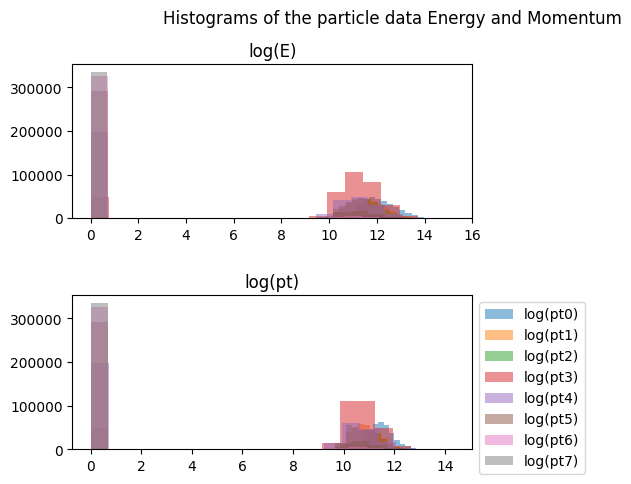

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(8, 5))
plt.suptitle('Histograms of the particle data Energy and Momentum')
plt.subplots_adjust(left=0.1, right=0.6, top=0.87, bottom=0.1, wspace=0.4, hspace=0.5)
energies = [f'log(E{i})' for i in range(number_chosen_events)]
momentums = [f'log(pt{i})' for i in range(number_chosen_events)]
for i in range(number_chosen_events):
    ax[0].hist(SM_df[energies[i]], bins=20, label=energies[i], alpha=0.5)
    ax[1].hist(SM_df[momentums[i]], bins=20, label=momentums[i],alpha=0.5)
ax[0].set(title='log(E)')
ax[1].set(title='log(pt)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### use MinMaxScalar

In [10]:
scaler = MinMaxScaler() 

### Randomise the SM dataset into traning and testing datasets

In [11]:
drop_metadata_cols = ['event ID', 'process ID']
standard_model_data = SM_df.copy()
standard_model_data.drop(drop_metadata_cols, inplace=True, axis='columns')
standard_model_data.astype(float)

bsm_data_list = []
for f in processed_csv_files[1:]:
    bsm_data_list.append(pd.read_csv(f, sep=';', names=processed_cols, dtype=df_dtype).fillna(0))
beyond_standard_model_data = pd.concat(bsm_data_list)
beyond_standard_model_data.drop(drop_metadata_cols, inplace=True, axis='columns')
standard_model_data

,event weight,MET,METphi,log(MET),N ele,N jets,N bjets,N photons,N muon,E0,pt0,eta0,phi0,log(E0),log(pt0),E1,pt1,eta1,phi1,log(E1),log(pt1),E2,pt2,eta2,phi2,log(E2),log(pt2),E3,pt3,eta3,phi3,log(E3),log(pt3),E4,pt4,eta4,phi4,log(E4),log(pt4),E5,pt5,eta5,phi5,log(E5),log(pt5),E6,pt6,eta6,phi6,log(E6),...,log(E11),log(pt11),E12,pt12,eta12,phi12,log(E12),log(pt12),E13,pt13,eta13,phi13,log(E13),log(pt13),E14,pt14,eta14,phi14,log(E14),log(pt14),E15,pt15,eta15,phi15,log(E15),log(pt15),E16,pt16,eta16,phi16,log(E16),log(pt16),E17,pt17,eta17,phi17,log(E17),log(pt17),E18,pt18,eta18,phi18,log(E18),log(pt18),E19,pt19,eta19,phi19,log(E19),log(pt19)
0,1.0,102549.0,-3.0,11.5,2,7,0,0,0,3.4e+05,132261.0,-1.6,1.0,12.7,11.8,270540.0,58844.5,2.2,1.6,11.6,11.6,186937.0,131480.0,8.9e-01,-0.2,11.4,11.0,148467.0,23648.0,-2.5,-1.7,12.5,11.0,107341.0,106680.0,-9.9e-02,-2.7e+00,10.9,10.9,85720.1,62009.0,0.8,-1.7e+00,10.8,10.5,80014.3,79281.7,0.1,0.3,11.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,103468.0,2.0,11.5,0,1,0,0,2,2.2e+05,109177.0,-1.3,-1.2,12.3,11.6,117239.0,105718.0,-0.5,2.0,11.7,11.6,17640.0,16335.2,4.0e-01,-1.9,9.8,9.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0e+00,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,129408.0,-1.2,11.8,0,1,1,0,2,1.7e+05,104808.0,-1.1,1.9,12.0,11.6,61263.0,38912.0,-1.0,2.7,11.0,11.0,61032.4,59133.2,-4.4e-02,1.9,10.8,10.7,47792.1,44843.2,-0.4,-0.4,11.0,10.6,0.0,0.0,0.0e+00,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,77774.2,-1.1,11.3,0,2,0,0,2,5.7e+05,96793.9,2.5,-1.3,12.3,11.6,220498.0,108012.0,1.3,1.9,12.2,10.1,190667.0,24036.4,2.8e+00,-2.2,13.3,11.5,27163.7,16336.2,1.1,3.0,10.2,9.7,0.0,0.0,0.0e+00,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,107151.0,-1.0,11.6,0,1,1,0,2,5.0e+05,176135.0,1.7,0.3,11.4,10.9,111635.0,25450.8,2.2,2.5,11.6,10.1,88031.8,53684.4,1.1e+00,2.3,13.1,12.1,49479.9,16162.5,1.8,-1.1,10.8,9.7,0.0,0.0,0.0e+00,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340263,1.0,65677.3,-1.2,11.1,0,1,1,0,2,1.1e+05,104145.0,-0.2,2.8,11.6,11.6,86433.0,69506.2,0.7,0.2,11.4,11.1,84809.3,83942.7,1.4e-01,-1.1,11.3,11.3,22615.6,20313.1,0.5,2.0,10.0,9.9,0.0,0.0,0.0e+00,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340264,1.0,58730.1,0.5,11.0,0,2,1,0,2,1.8e+05,41739.4,-2.1,0.7,11.6,11.2,132186.0,31154.3,2.1,-0.2,11.2,10.8,108441.0,69580.2,-1.0e+00,3.0,1

In [12]:
## scaling datdset & shuffle ##
X_train = shuffle(scaler.fit_transform(standard_model_data))
X_anomalies = shuffle(scaler.transform(beyond_standard_model_data))

## labels ##
Y_train = np.zeros((X_train.shape[0], 1))
Y_anomalies = np.ones((X_anomalies.shape[0], 1))

## conbine ##
X_test = shuffle(np.vstack((X_train, X_anomalies)))

# 2. Model selection
I have chosen to use and AutoEncoder

In [13]:
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=10),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)]
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

### Leaning rate
I have manually entered the learning rate as bcasue witht eh Adam optimizer the detault is 1e-3 and this will prevent it from exploring different learning rates, impacting the optimisation.

### Layers
latent_input_shape defines a hyperparameter for the number of units in the latent layer of the autoencoder. The number of latent units can/will be tuned during the during hyperparameter optimization.

no_layers is for the encoeder and decoeder, will be tuned by the hyperparameter optinization.

### Encoder
Made up of dense layers, I have chosen the activation fucntion gelu because it fits more smoothly. The loop make up allthe dense layers. The data is compressed into a lower dimentional latent space representaion.

### Decoder
again activation function gelu for the same reasons. softmax is then used so that all the probailities add up to 1, with the goal to predict the probability distribution over multiple classes.

### Tensor
AE this is constructing the autoencoder's model by connecting the encoder's input tensor to the decoder's output one. Then the model is compiled.

In [14]:
def build_model(hyp_params):
    input_shape = (X_train.shape[1],)
    latent_input_shape = hyp_params.Int('output_units', 1, 20, 1)
    no_layers = hyp_params.Int('layers', 2, 6)
    learning_rate = hyp_params.Float('learning_rate', 1e-4, 1e-1, sampling='log') # log because the energies are logged
    
    layer_nodes = []
    for i in range(no_layers):
        layer_nodes.append(hyp_params.Int('units_'+str(i), 16, 256, 16))
    
    ## Encoder
    encoder = Sequential(name="encoder")
    encoder.add(Input(shape=input_shape))
    for i in range(no_layers):
        encoder.add(Dense(layer_nodes[i], activation='gelu'))
        
    encoder.add(Dense(latent_input_shape, activation='gelu'))

    # Decoder
    decoder = Sequential(name="decoder")
    decoder.add(Input(shape=(latent_input_shape,)))
    for i in range(no_layers):
        decoder.add(Dense(layer_nodes[::-1][i], activation='gelu'))
    decoder.add(Dense(input_shape[0], activation='softmax'))

    ## defining input tensor and connecting encoder to decoder ##
    i = encoder.input
    AE = Model(inputs=i, outputs=decoder(encoder(i)), name="AE")

    AE.compile(optimizer=Adam(learning_rate), loss='mean_squared_error', metrics=['mse','accuracy'])

    return AE

## Hyperparameter optinization
- it will run for 10 epochs, twice (max_trials=2 due to limited power on my computer). the initial search does not need the same number of epochs as the actual training.
- I have chosen val_loss as the objective. 
- only 1 exicution per trial
- add direcotry where the results will be saved, named autoencoder_hyperparameter_search
- stop_early monitors the val_loss and stops the run if it si satisfied. This helps prevent overfitting.
- validation_split splits the data into traning and validation 20% validation and 80% traning.

In [15]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=2,
    executions_per_trial=1,
    directory='autoencoder_hyperparameter_search',
    project_name='autoencoder'
)

Reloading Tuner from autoencoder_hyperparameter_search\autoencoder\tuner0.json


In [16]:
## search for the best hyperparameters ##
tuner.search(X_train, X_train, epochs=10, callbacks=[stop_early], validation_split=0.2)

## get the best hyperparameters ##
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

## build the final model with the best hyperparameters ##
final_model = tuner.hypermodel.build(best_hyperparameters)

## number of epochs ##
epochs = 50

In [17]:
best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
for key, value in best_hyperparams.values.items():
    print(f"{key}: {value}")


Best hyperparameters:
output_units: 20
layers: 2
learning_rate: 0.0003021915685516182
units_0: 96
units_1: 224
units_2: 144
units_3: 256
units_4: 256
units_5: 48


### Showing the final tuned parameters

In [18]:
my_ae_model = build_model(best_hyperparams)
my_ae_model.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 129)]             0         
                                                                 
 encoder (Sequential)        (None, 20)                38708     
                                                                 
 decoder (Sequential)        (None, 129)               38817     
                                                                 
Total params: 77525 (302.83 KB)
Trainable params: 77525 (302.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history_ae = my_ae_model.fit(X_train, X_train, 
                      epochs=epochs, 
                      batch_size=125, 
                      shuffle=True, 
                      validation_split=0.1,
                      callbacks=callbacks) 

Epoch 1/50


2450/2450 [==============================] - 19s 7ms/step - loss: 0.0506 - mse: 0.0506 - accuracy: 0.5424 - val_loss: 0.0497 - val_mse: 0.0497 - val_accuracy: 0.7473 - lr: 3.0219e-04
Epoch 2/50
2450/2450 [==============================] - 16s 6ms/step - loss: 0.0498 - mse: 0.0498 - accuracy: 0.7772 - val_loss: 0.0496 - val_mse: 0.0496 - val_accuracy: 0.7630 - lr: 3.0219e-04
Epoch 3/50
2450/2450 [==============================] - 16s 6ms/step - loss: 0.0497 - mse: 0.0497 - accuracy: 0.7923 - val_loss: 0.0496 - val_mse: 0.0496 - val_accuracy: 0.8160 - lr: 3.0219e-04
Epoch 4/50
2450/2450 [==============================] - 15s 6ms/step - loss: 0.0497 - mse: 0.0497 - accuracy: 0.8097 - val_loss: 0.0496 - val_mse: 0.0496 - val_accuracy: 0.8190 - lr: 3.0219e-04
Epoch 5/50
2450/2450 [==============================] - 15s 6ms/step - loss: 0.0497 - mse: 0.0497 - accuracy: 0.8205 - val_loss: 0.0496 - val_mse: 0.0496 - val_accuracy: 0.8344 - lr: 3.0219e-04
Epoch 6/50
2450/2450 [======

In [20]:
## save and load model ##
my_ae_model.save("my_ae_model.h5")
loaded_ae_model = load_model("my_ae_model.h5")

c:\Users\hanna\Documents\University\Year 4\DAML\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### mean squared error used as a mertic to evaluate errors

# 3. Performance Evaluation

C:\Users\hanna\AppData\Local\Temp\ipykernel_5672\3874375910.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0, top=np.max(history_ae.history['loss']))


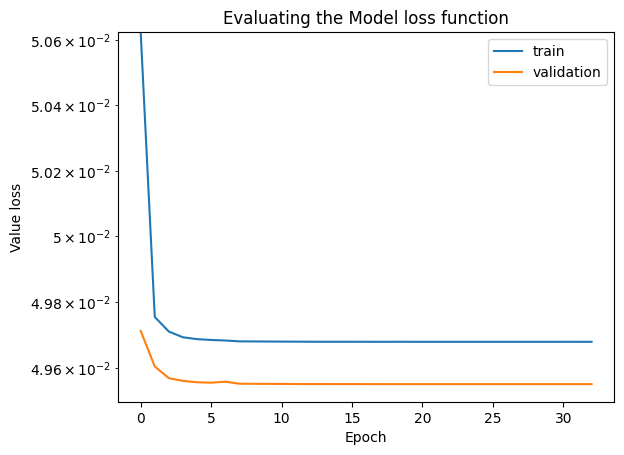

In [21]:
## plot the performance with history ##
plt.plot(history_ae.history['loss'])
plt.plot(history_ae.history['val_loss'])
plt.title('Evaluating the Model loss function')
plt.ylabel('Value loss')
plt.xlabel('Epoch')
## log to see smaller differences ##
plt.yscale('log')
plt.ylim(bottom=0, top=np.max(history_ae.history['loss']))
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

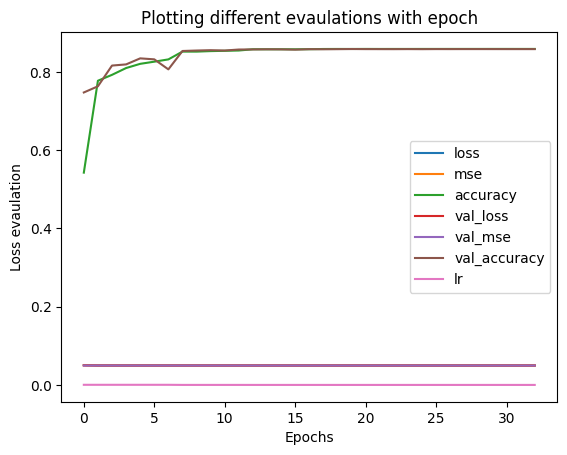

In [22]:
## plot the differnt evlautiaons with epoch ##
results_ae = history_ae.history
for key in results_ae:
    plt.plot(range(len(results_ae[key])), results_ae[key], label=key)

plt.xlabel('Epochs')
plt.ylabel('Loss evaulation')
plt.title('Plotting different evaulations with epoch')
plt.legend()


In [23]:
## run the dataset on the anomolies ##
reconstructed_anomalies = loaded_ae_model.predict(X_anomalies)
reconstruction_anom_errors = [mean_squared_error(x_true, x_pred) for x_true, x_pred in zip(X_anomalies, reconstructed_anomalies)]

2803/2803 [==============================] - 8s 3ms/step


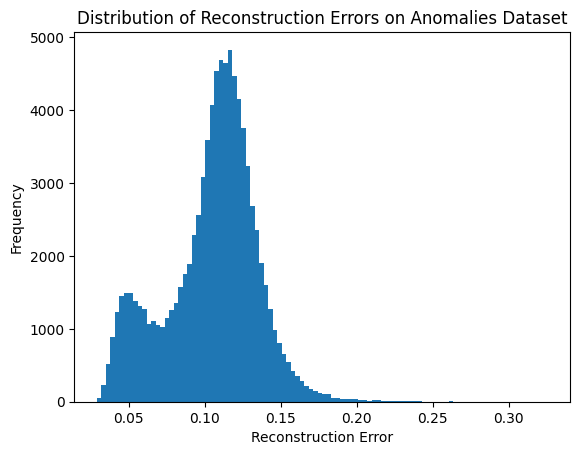

In [24]:
## analyse the reconstruction errors ##
plt.hist(reconstruction_anom_errors, bins=100)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Errors on Anomalies Dataset')
plt.show()

In [25]:
## analyse the sample with the largest reconstruction errors ##
num_samples_to_display = 5
image_height, image_width = 8, 8
most_anomalous_indices = sorted(range(len(reconstruction_anom_errors)), key=lambda i: reconstruction_anom_errors[i], reverse=True)[:num_samples_to_display]
most_anomalous_samples = X_anomalies[most_anomalous_indices]
reconstructed_most_anomalous_samples = reconstructed_anomalies[most_anomalous_indices]
print(most_anomalous_samples[0].shape)

(129,)


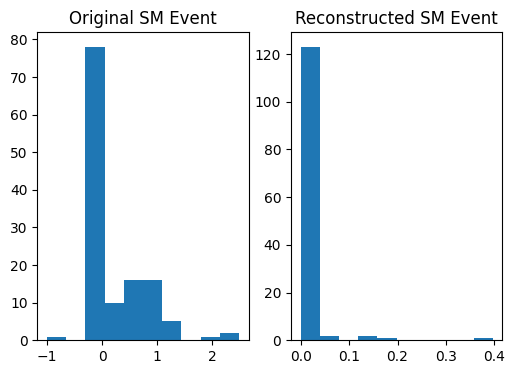

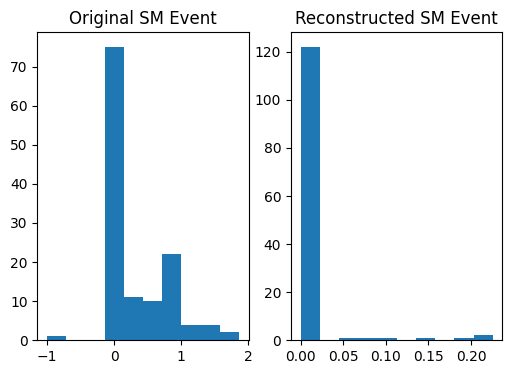

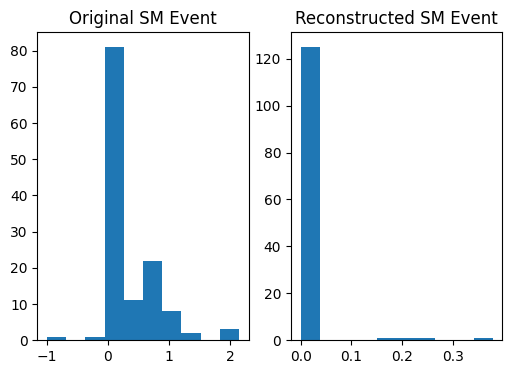

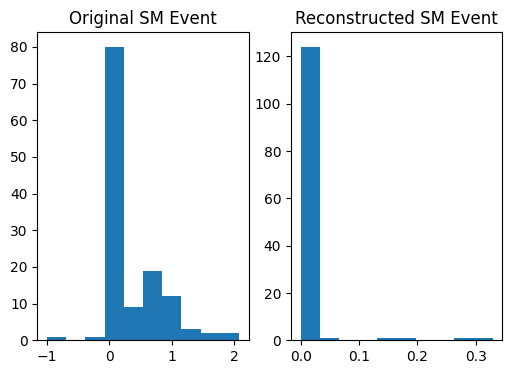

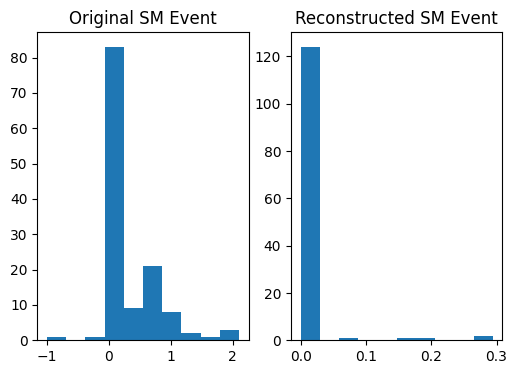

In [26]:
for i in range(num_samples_to_display):
    plt.figure(figsize=(6, 4))
    ## original sample ##
    plt.subplot(1, 2, 1)
    plt.hist(most_anomalous_samples[i])
    plt.title('Original SM Event')
    ## reconstructed sample ##
    plt.subplot(1, 2, 2)
    plt.hist(reconstructed_most_anomalous_samples[i])
    plt.title('Reconstructed SM Event')

    plt.show()

# 4. Discussion

`Evaluate the performance of the AE on BSM dataset. Which models are more or less similar to the SM?`

Comparing the SM to the BSM using the mean square error fro each daa sample lower loss = more similar to the SM dataset.

`Explore the anomaly score as a handle on finding new physics. Consider scanning over different anomaly scores and calculating the signal and background efficiencies at each point (plot this for different BSM models). How might you choose a value which flags up a non-SM event?`

to find the non SM events I need to choose a threshold for the anomoly score. using the labelled data scan over the threshold values then pick a threshold that maximises the seperation between the SM and BSM dataset.

`Explore SM events. Which look more anomalous than others? Are there any particular features which are responsible, e.g., particle counts, MET ranges, etc.?`

I have analysed the reconstructed SM events with the anomoly data. there is a clear peak in the histogram named "Distribution of Reconstruction Errors on Anomalies Dataset". I have identified the anomolies that deviate the most.

`Discuss any limitations your algorithm has. How might you update and improve your model in the future? Discuss any issues you had, or things you would have liked to try given more time.`

Perforamance of the Autoencoder maybe sensttive to some of the hyperparams. Since the data is similar with the majority being not anomolies the dataset should genralise well, however, with unseen data this is difficult to know. augmentation and regularization could help improve the genralissation. Using  GAN or variational auto encoder may help to genralise the trainging.

more hyperparameter opinization would also improve the model to be able to find-tune the laten space parameters.

